In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Dataset 3.csv")

In [3]:
df.head()

,Temperature,Humidity,pH,Rainfall,Label
0,20.879744,82.002744,6.502985,202.935536,Rice
1,21.770462,80.319644,7.038096,226.655537,Rice
2,23.004459,82.320763,7.840207,263.964248,Rice
3,26.491096,80.158363,6.980401,242.864034,Rice
4,20.130175,81.604873,7.628473,262.717340,Rice


In [4]:
df.tail()

,Temperature,Humidity,pH,Rainfall,Label
6995,19.194357,35.963156,6.425478,762.042570,Mustard
6996,23.493703,31.379660,6.134113,765.190596,Mustard
6997,18.190361,42.783204,6.872391,904.892120,Mustard
6998,23.148364,41.001895,6.185536,731.770490,Mustard
6999,24.180054,42.368177,6.473565,906.173454,Mustard


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  7000 non-null   float64
 1   Humidity     7000 non-null   float64
 2   pH           7000 non-null   float64
 3   Rainfall     7000 non-null   float64
 4   Label        7000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 273.6+ KB


In [6]:
df.shape

(7000, 5)

In [7]:
corr_matrix = df.select_dtypes(include=['number']).corr()
print(corr_matrix)

             Temperature  Humidity        pH  Rainfall
Temperature     1.000000 -0.064063 -0.030075  0.079162
Humidity       -0.064063  1.000000 -0.041540 -0.025766
pH             -0.030075 -0.041540  1.000000 -0.000608
Rainfall        0.079162 -0.025766 -0.000608  1.000000


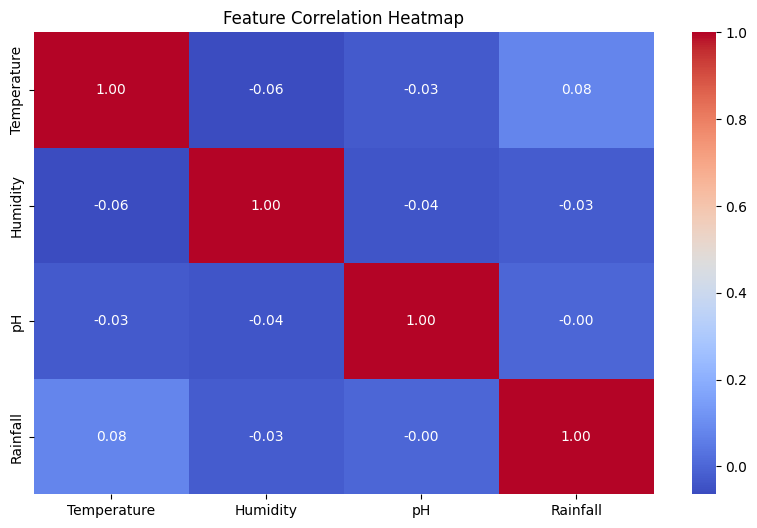

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
df['Label'].unique()

array(['Rice', 'Maize', 'Banana', 'Jute', 'Pulses', 'Mango', 'Papaya',
       'Tea', 'Aleovera', 'Arecanut', 'Ashwagandha', 'Rose', 'Blackgram',
       'Chickpea', 'Coconut', 'Coffee', 'Cotton', 'Grapes', 'Kidneybeans',
       'Mothbeans', 'Mungbeans', 'Muskmelon', 'Orange', 'Piegonpeas',
       'Pomegranate', 'Watermelon', 'Apple', 'Cabbage', 'Cauliflower',
       'Green Chillies', 'Carrot', 'Ginger', 'Garlic', 'Onion', 'Brinjal',
       'Button Mushrooms', 'Potato', 'Capsicum', 'Tomato',
       "Lady's Finger", 'DragonFruit', 'Olive', 'Marigold', 'Beetroot',
       'Lettuce', 'Corn', 'Green Peas', 'Cucumber', 'Guava', 'Turmeric',
       'Rajma', 'Pumpkin', 'Litchi', 'Broccoli', 'Spinach', 'Groundnut',
       'Jackfruit', 'Radish', 'Chinese Cabbage', 'Drumstick', 'Soybean',
       'Sweet Potato', 'Poppy Seeds', 'Coriander', 'Walnuts',
       'Cashewnuts', 'French Beans', 'Sugarcane', 'Bajra', 'Mustard'],
      dtype=object)

In [10]:
df['Label'].value_counts()

Label
Rice            100
Maize           100
Banana          100
Jute            100
Pulses          100
               ... 
Cashewnuts      100
French Beans    100
Sugarcane       100
Bajra           100
Mustard         100
Name: count, Length: 70, dtype: int64

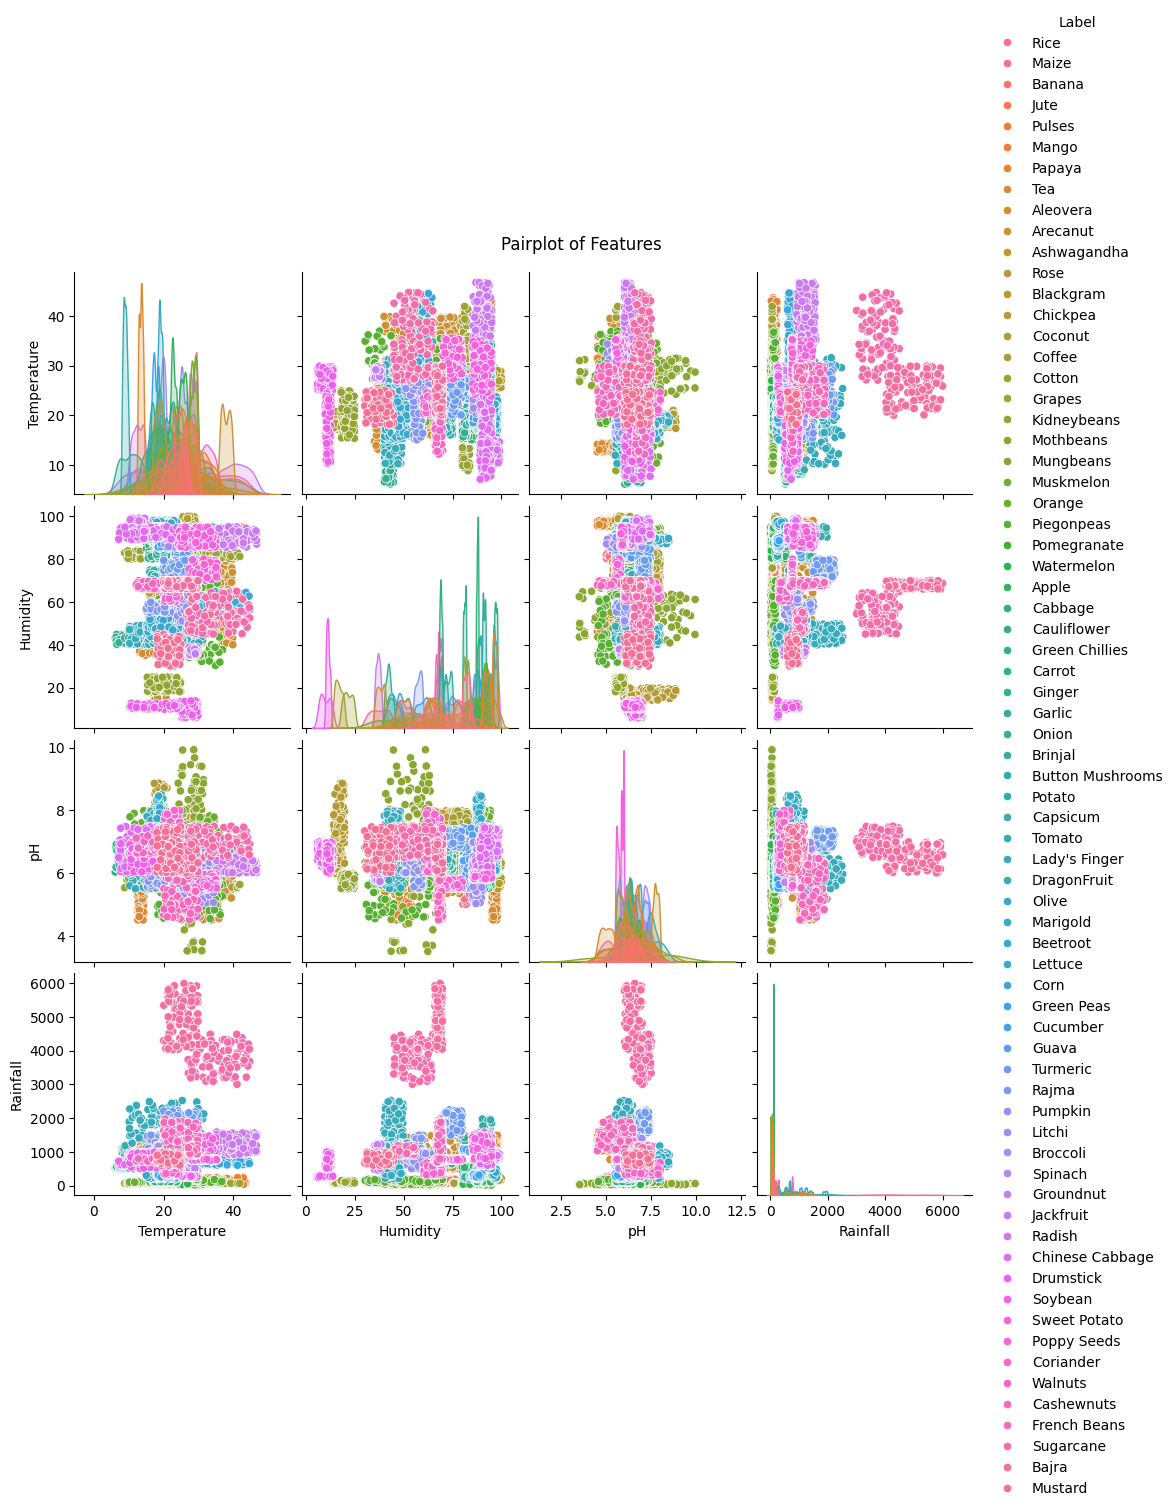

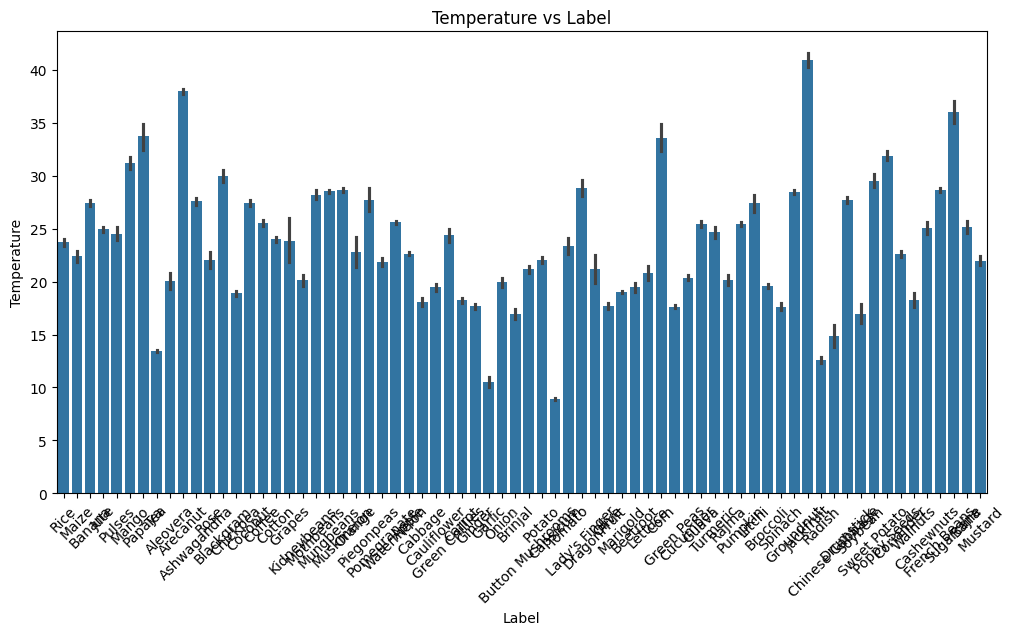

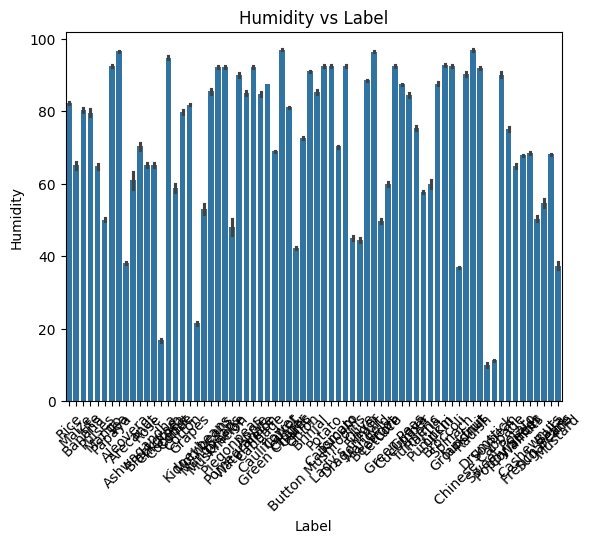

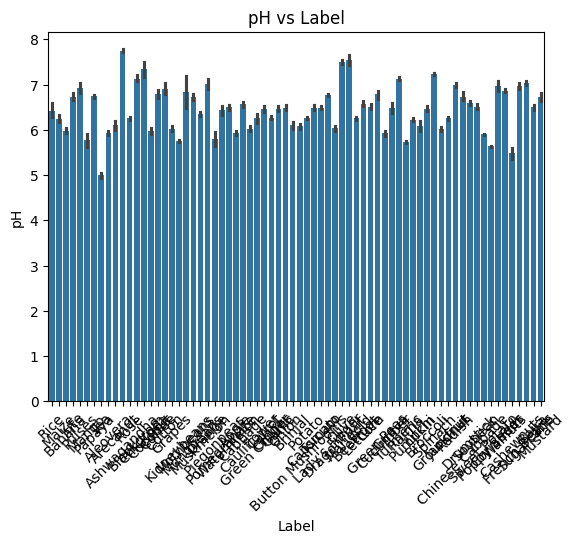

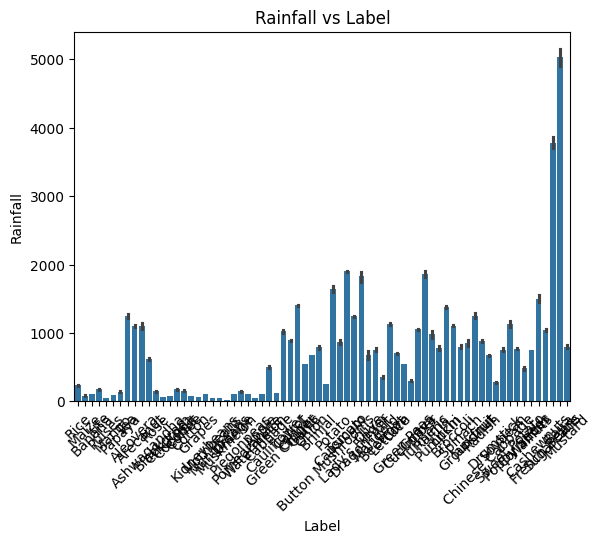

In [11]:
#  Class Distribution (Target variable)

target_col = df.columns[-1]  # assuming last column is target



#  Pairplot (only if dataset not too large)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if len(numeric_cols) > 1:
    sns.pairplot(df, hue=target_col, diag_kind="kde")
    plt.suptitle("Pairplot of Features", y=1.02)
    plt.show()


#  Barplot for Feature vs Target

plt.figure(figsize=(12, 6))
for col in numeric_cols[:4]:  # plot first 4 features
    sns.barplot(x=target_col, y=col, data=df)
    plt.title(f"{col} vs {target_col}")
    plt.xticks(rotation=45)
    plt.show()

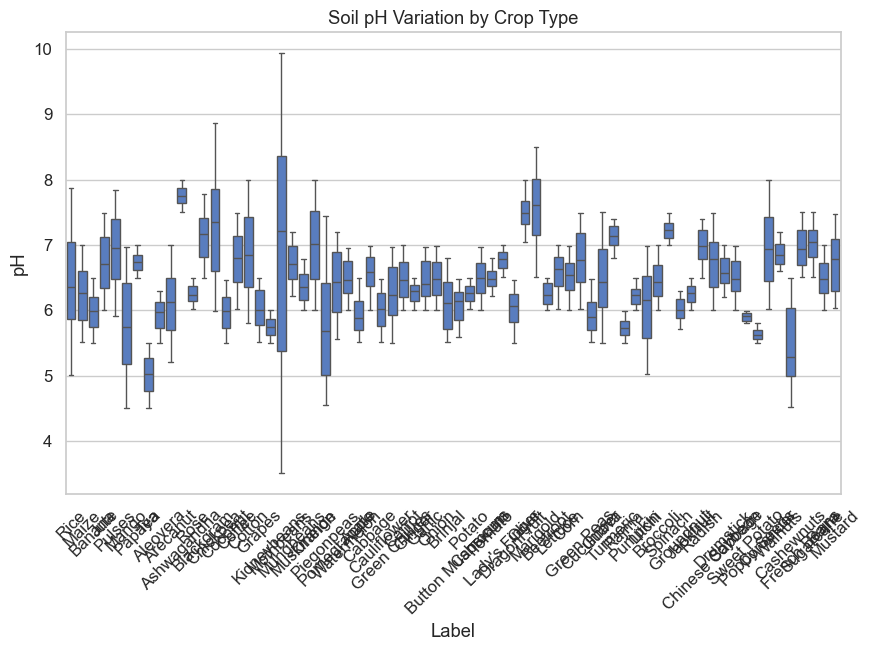

C:\Users\yogesh\AppData\Local\Temp\ipykernel_16576\3451852936.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_water.values, y=avg_water.index, palette="viridis")


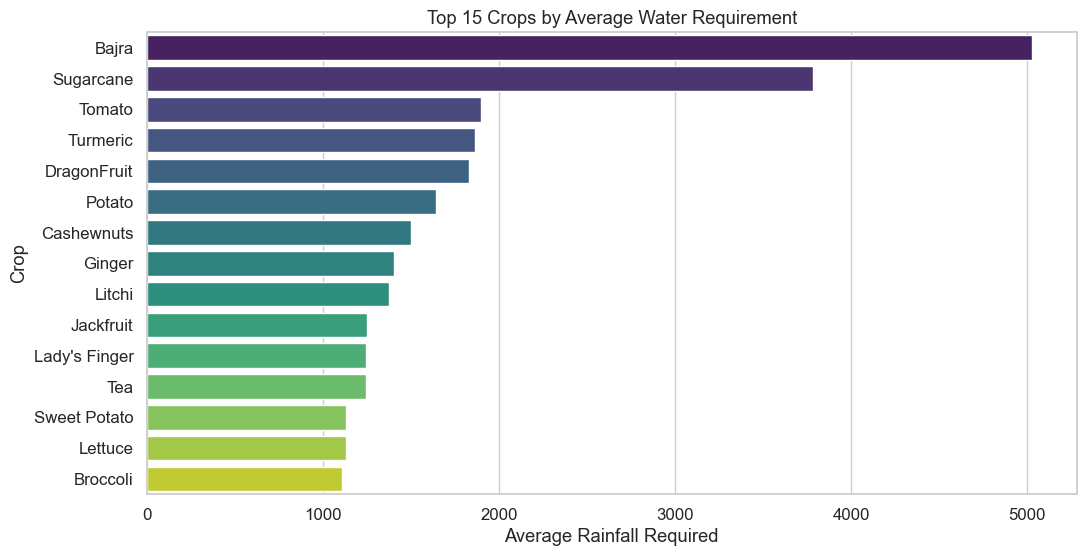

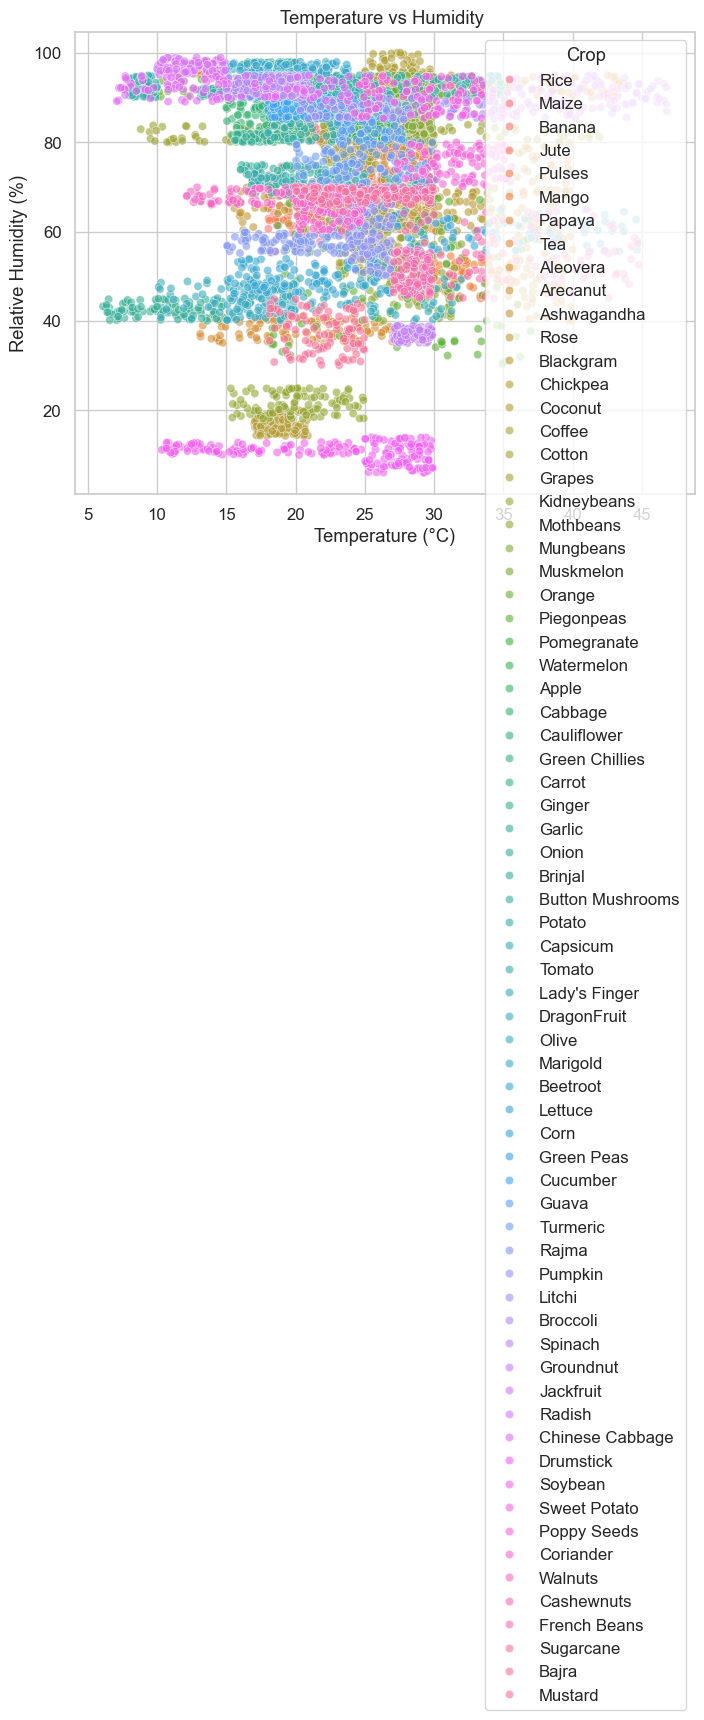

In [12]:

# Set Seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)



# 2. Average Soil pH by Crop Type
plt.figure(figsize=(10,6))
sns.boxplot(x="Label", y="pH", data=df)
plt.title("Soil pH Variation by Crop Type")
plt.xticks(rotation=45)
plt.show()

# 3. Average Water Requirement per Crop
avg_water = df.groupby("Label")["Rainfall"].mean().sort_values(ascending=False)[:15]
plt.figure(figsize=(12,6))
sns.barplot(x=avg_water.values, y=avg_water.index, palette="viridis")
plt.title("Top 15 Crops by Average Water Requirement")
plt.xlabel("Average Rainfall Required")
plt.ylabel("Crop")
plt.show()

# 4. Temperature vs Humidity Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Temperature", y="Humidity", hue="Label", data=df, alpha=0.6)
plt.title("Temperature vs Humidity ")
plt.xlabel("Temperature (°C)")
plt.ylabel("Relative Humidity (%)")
plt.legend(title="Crop")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# 2️⃣ Separate features and target
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]  

# 3️⃣ Encode categorical labels (if needed)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4️⃣ Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 5️⃣ Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Train SVM Model
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train_scaled, y_train)

# 7️⃣ Evaluate accuracy
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model trained successfully! Accuracy: {acc*100:.2f}%")
error_rate = 1 - acc


print(f"❌ Error Rate: {error_rate*100:.2f}%")


✅ Model trained successfully! Accuracy: 82.86%
❌ Error Rate: 17.14%


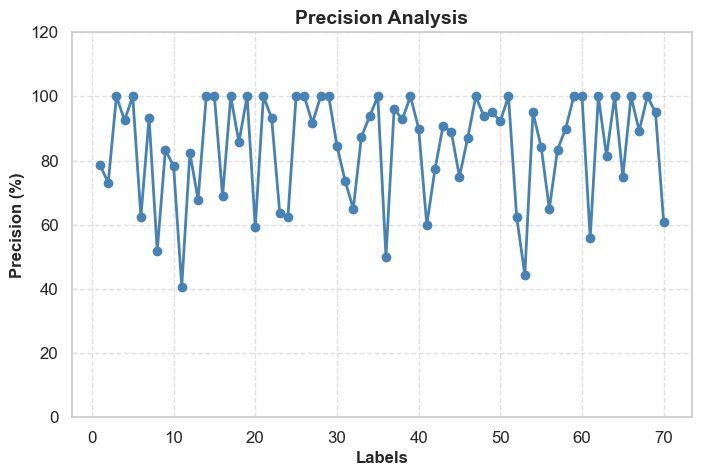

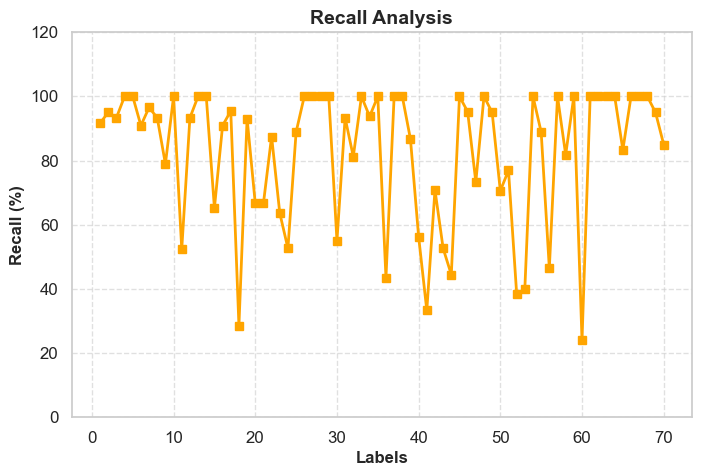

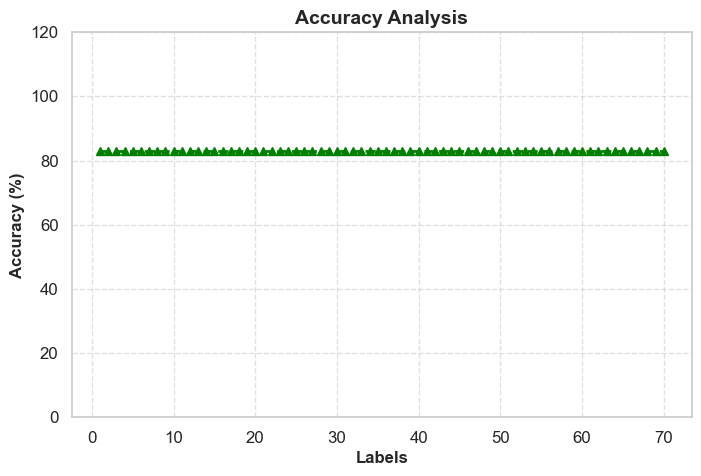

✅ Overall Accuracy of Model: 82.86%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.73      0.95      0.83        20
           2       1.00      0.93      0.97        15
           3       0.93      1.00      0.96        25
           4       1.00      1.00      1.00        21
           5       0.62      0.91      0.74        22
           6       0.93      0.97      0.95        29
           7       0.52      0.93      0.67        15
           8       0.83      0.79      0.81        19
           9       0.78      1.00      0.88        18
          10       0.41      0.52      0.46        21
          11       0.82      0.93      0.88        15
          12       0.68      1.00      0.81        19
          13       1.00      1.00      1.00        20
          14       1.00      0.65      0.79        23
          15       0.69      0.91      0.78        22
          16       1

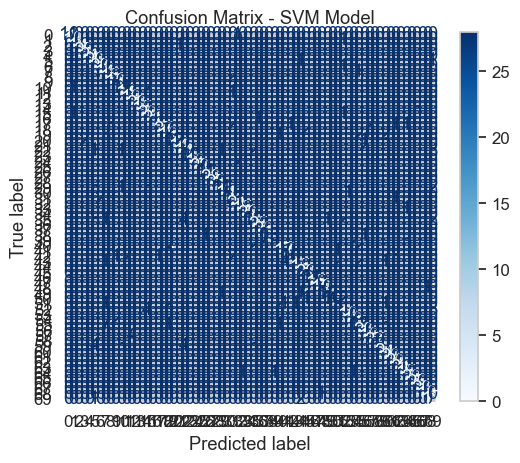

In [14]:
# 8️⃣ Get classification metrics
report = classification_report(y_test, y_pred, output_dict=True)
labels = range(1, len(le.classes_) + 1)

# Extract per-class metrics
precision = [report[str(i)]['precision'] * 100 for i in range(len(le.classes_))]
recall = [report[str(i)]['recall'] * 100 for i in range(len(le.classes_))]
accuracy_value = accuracy_score(y_test, y_pred) * 100
accuracy = [accuracy_value] * len(le.classes_)

# Get crop names for x-axis
crop_names = le.classes_

# 9️⃣ Plot Precision Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, precision, marker='o', color='steelblue', linewidth=2)
plt.title("Precision Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Precision (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# 🔟 Plot Recall Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, recall, marker='s', color='orange', linewidth=2)
plt.title("Recall Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Recall (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 1️⃣1️⃣ Plot Accuracy Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, accuracy, linestyle='--', color='green', linewidth=2, marker='^')
plt.title("Accuracy Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"✅ Overall Accuracy of Model: {accuracy_value:.2f}%")


# Confusion Matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM Model")
plt.show()


In [15]:
# 8️⃣ Take user input for prediction
print("\n🌾 Enter values for prediction:")

user_input = []
for feature in X.columns:
    value = float(input(f"Enter {feature}: "))
    user_input.append(value)

# ✅ Convert input to DataFrame with same feature names
user_df = pd.DataFrame([user_input], columns=X.columns)

# ✅ Scale and predict safely
user_input_scaled = scaler.transform(user_df)
predicted_crop = label_encoder.inverse_transform(model.predict(user_input_scaled))[0]

print("\n🌱 Recommended Crop:", predicted_crop)



🌾 Enter values for prediction:


Enter Temperature:  25
Enter Humidity:  5
Enter pH:  5
Enter Rainfall:  230



🌱 Recommended Crop: Kidneybeans
